# Machine Learning and Statistics Project 2020

## Table of contents
1. [Introduction](#introduction)

2. [Decision Trees](#dectree)

    2.1 [Preprocessing](#preproc)
    
    2.2 [Algorithm](#alg)
    
    2.3 [Predictions](#pred)

3. [Neural Networks](#neural)
    
    2.1 [Algorithm](#alg2)
    
    2.2 [Predictions](#pred2)

4. [Random Forest](#randfor)
    
    2.1 [Algorithm](#alg3)
    
    2.2 [Predictions](#pred3)

4. [Discussion](#disc)
    
5. [References](#ref)

## Introduction <a name="introduction"></a>
The goal of this project is to make 3 predictive models which predict wind turbine power from wind turbine speed. The dataset features and labels (i.e. input and output values) [1](#1) are both continuous so regression models are employed. The three models are Decision Trees, Neural Networks and Random Forest respectively (all are supervised learning algorithms).

## Decision Trees <a name="dectree"></a>
This project will use the the DecisionTreeRegressor function from the sklearn package to perform regression using Decision Trees. 

Decision Trees work by breaking down the dataset into smaller and smaller segments while a "decision tree" (i.e. a node structure with tests at each node to divide the data) is developed node by node. [2](#2)

This algorithm works in the same way for both classification and regression.


### Preprocessing <a name="preproc"></a>
First the data is imported and preprocessed. The preprocessing consists in splitting up the data into feature data (x values) and labels (y values) and rehsaping the X values as the LinearRegression() from linear_model function does not take a 1D array for the X values. First, a scatter plot of the data is produced to get a sense of the relationship between the variables and possible outliers:

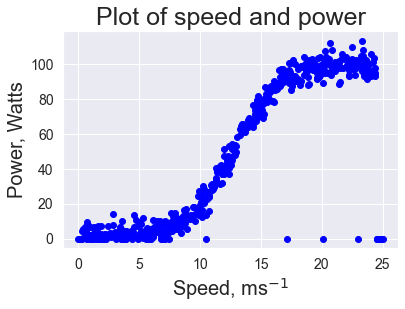

In [2]:
# import data 
import pandas as pd
import matplotlib.pyplot as plt
# seaborn to make plot look nice
import seaborn as sns
sns.set()

# read in csv file power production into
# dataframe
lin_data = pd.read_csv('powerproduction.csv')

# X and y values for regression
X = lin_data.iloc[:, 0].values
y = lin_data.iloc[:, 1].values

def scatter_plot(X, y, col, mark, lab):
    # scatter plot of data set
    plt.scatter(X, y, color=col, marker=mark, label=lab);

    # Title of plot
    plt.title("Plot of speed and power", fontsize=25)
    
    # the x label of plot
    plt.xlabel("Speed, ms$^{-1}$", fontsize=20)
    
    # the y label of plot
    plt.ylabel("Power, Watts", fontsize=20)
    
    # change size of ticks of x and y axes
    ax = plt.gca()
    ax.tick_params(axis = 'both',which = 'major', labelsize = 14)
    
scatter_plot(X, y, "blue", 'o', 'power')

The plot resembles the sigmoid function [3](#3). There are outliers clearly present in the scatter plot. The appropriate method to deal with outliers varies from dataset to dataset. In this case, it is clear that several of the outliers (near power=0 Watts, after speed=10ms<sup>-1</sup>) are unrelated to the apparent shape of the data and might be mistakes. As such, it is appropriate to remove them [4](#4).

In [3]:
# identifying rows where power = 0 and speed > 10
lin_data.loc[(lin_data['power'] == 0 ) & (lin_data['speed'] > 10)]

,speed,power
208,10.511,0.0
340,17.167,0.0
404,20.095,0.0
456,22.998,0.0
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0


In [4]:
# remove rows by row numbers
lin_data = lin_data.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]);
# check if rows have been removed
lin_data.loc[(lin_data['power'] == 0 ) & (lin_data['speed'] > 10)].size

0

The outliers have been successfully removed from the dataset. They can now be reshaped as outlined at the start of this section:

In [6]:
# X and y values for regression
X = lin_data.iloc[:, 0].values
y = lin_data.iloc[:, 1].values

# The X values are reshaped as 
# they only contain one feature
X = X.reshape(-1, 1)

### Algorithm <a name="alg"></a>
The train_test_split function is defined using the model_selection module from the sklearn package. This is used to randomly split the data into training and testing data.
The DecisionTreeRegressor function is defined and used to fit a regressor to the X_train and y_train datasets. A test size of 20% of the data is chosen (so 80% of the data is training data).

In [7]:
# decision tree regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# train_test_split on dataset, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create regressor and fit it to training data
regressor = DecisionTreeRegressor();
regressor.fit(X_train, y_train);

### Predictions <a name="pred"></a>
The predicted values are calculated using the regressor and the X_test testing data. Then various metrics (mean absolute error, mean squared error and root mean squared error) are calculated to test the efficacy of the model. In addition, the coefficient of variation (the root mean squared error RMSE as a percentage of the mean of the observed values) is calculated.

In [8]:
# get metrics from sklearn
from sklearn import metrics
import numpy as np
# predicted y values
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of observed y values:', np.mean(y_test))
# coefficient of variation 
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Coefficient of variation:', (100*RMSE)/np.mean(y_test))

Mean Absolute Error: 4.479061224489796
Mean Squared Error: 32.78614765306122
Root Mean Squared Error: 5.725918935250587
Mean of observed y values: 49.49011224489796
Coefficient of variation: 11.569824103280114


The coefficient of variation is 11.57%. A good coefficient of variation is considered to be less than 25% [5](#5) so the decision tree regression model is very accurate at predicting power from speed values.

A visualisation of the regression is as follows:

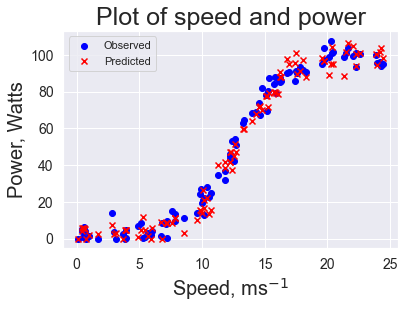

In [9]:
scatter_plot(X_test, y_test, "blue", "o", "Observed")
scatter_plot(X_test, y_pred, "red", "x", "Predicted")
plt.legend()
plt.show()

The predicted values from the regression model are usually quite close to the observed values.

## Neural Networks <a name="neural"></a>
This project will use the Input, Dense and Model classes from the tensorflow.keras package to perform regression using Artificial Neural Networks.

Neural networks operate in a similar manner to neurons in the brain [6](#6). Nodes in the neural network are connected together and they each have an activation function which depends on the inputs (which are the outputs of the other neurons, obtained via the connections). 

Activation functions differ but generally they are approximately 1 when a certain threshold value has been reached and approximately 0 if that value has not been reached. In addition, the connections between the neurons have weights which amplify or diminish the outputs (in an artificial neural network these are  set to randomly chosen small numbers) [7](#7)

In a typical artificial neural network, there is an input layer of neurons (which have inputs not connected to any other neuron), an output layer (which have outputs not connected to any other neuron) and a hidden layer (neurons which have inputs and outputs connected to other neurons). A deep neural network has multiple hidden layers. [8](#8)

Neural networks can be used to learn functions and patterns to make predictions. Tensorflow makes predictions using neural networks.

### Algorithm <a name="alg2"></a>
The data preprocessed for the decision tree classifier (lin_data) is used here for training and testing data.

The train_test_split function is used again to split the data into training and testing data.

The Input and Dense classes are imported from tensorflow.keras.layers. The input layer and the hidden layers of the neural network are created as objects of these classes. [9](#9)

There are 500 nodes in the first hidden layer of the artificial neural network. This number was chosen
because there are 500 features and 500 labels to train the model on. The inputs of this layer are connected to the outputs of the input layer (whose shape is the shape of the input data X).

After this, two more hidden layers, the first with 100 neurons and the second with 50 neurons, are created. The outputs of the last hidden layer are connected to the output layer (which has only 1 neuron). 

The activation function for the hidden layers in this case is the rectified linear activation function or "relu". It is a piecewise linear function that returns the input if the input is positive. If the input is not positive it outputs 0. [10](#10)

A regression model called model is created using the Model class. It uses the mean_squared error function for the loss function and the Adam algorithm for the optimiser. [11](#11)

The model is compiled as follows:

In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# train and test data, test_size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# input, hidden and output layers
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(500, activation='relu')(input_layer)
dense_layer_2 = Dense(100, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(50, activation='relu')(dense_layer_2)
#dense_layer_5 = Dense(10, activation='relu')(dense_layer_4)
output = Dense(1)(dense_layer_3)

# create model 
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

The model is trained on the training data using the fit function. This function takes the training and testing data, the batch_size attribute (which determines how the dataset is broken up, in this case into 2 batches), epochs (which determines how many passes over the dataset will be done), verbose (which determines whether the training is visible or not, in this case not) and validation_split (which splits the data for cross validation). Also, tic and toc variables are declared to show how long the training took.

In [54]:
# time for tic and toc variabls
import time
tic = time.perf_counter();
# fit model to training data, 15 epochs
history = model.fit(X_train, y_train, batch_size=2, epochs=15, verbose=0, validation_split=0.2);
toc = time.perf_counter();
print("")
print(f"The training was accomplished in {toc - tic:0.4f} seconds")


The training was accomplished in 2.5211 seconds


### Predictions <a name="pred2"></a>
The predicted values are calculated using the regressor and the X_test testing data as before. Then various metrics (including the coefficient of variation) are calculated to test the efficacy of the model as before.

In [55]:
# predicted y values using model
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of observed y values:', np.mean(y_test))
# coefficient of variation 
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Coefficient of variation:', (100*RMSE)/np.mean(y_test))

Mean Absolute Error: 3.4408083855765215
Mean Squared Error: 18.37330100195916
Root Mean Squared Error: 4.286408870133501
Mean of observed y values: 49.49011224489796
Coefficient of variation: 8.661141944723305


The coefficient of variation in this case is 8.66%. This is much less than the aforementioned threshold value of 25% so this is a very accurate regression model. However, the model took 2.5211 seconds to train the data, which is more than the Decision Tree regression which was approximately instantaneous.

A visualisation of the predicted values is as follows:

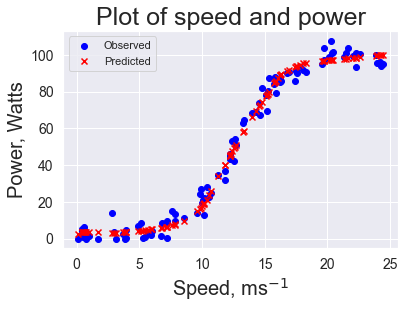

In [56]:
scatter_plot(X_test, y_test, "blue", "o", "Observed")
scatter_plot(X_test, y_pred, "red", "x", "Predicted")
plt.legend()
plt.show()

The predicted values from the regression model are usually very close to the predicted values.

## Random Forest <a name="randfor"></a>
This project will use the RandomForestRegressor function from sklearn to perform the regression.

The algorithm works by combining the results from more than one decision tree to improve the result from one alone [12](#ref2). It can be used for both regression and classification.

In the regression case, it works by getting the average of each regression done by each decision tree.

### Algorithm <a name="alg3"></a>
The data preprocessed for the decision tree classifier (lin_data) is used here for training and testing data.

The train_test_split function is used again to split the data into training and testing data.

The attribute n_estimators in RandomForestRegressor is the number of decision trees that will be generated.

In [57]:
from sklearn.ensemble import RandomForestRegressor

# train and test data, test_size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=20, random_state=0);
regressor.fit(X_train, y_train);

### Predictions <a name="pred3"></a>
The predicted values are calculated using the regressor and the X_test testing data as before. Then various metrics (including the coefficient of variation) are calculated to test the efficacy of the model as before.

In [58]:
# predicted y values using model
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of observed y values:', np.mean(y_test))
# coefficient of variation 
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Coefficient of variation:', (100*RMSE)/np.mean(y_test))

Mean Absolute Error: 3.7109551020408147
Mean Squared Error: 22.40140609683672
Root Mean Squared Error: 4.733012370239139
Mean of observed y values: 49.49011224489796
Coefficient of variation: 9.56355149654581


The coefficient of variation in this case is 9.56%. This is much less than the aforementioned threshold value of 25% so this is a very accurate regression model. In addition the training was done almost instantaneously.

A visualisation of the predicted values is as follows:

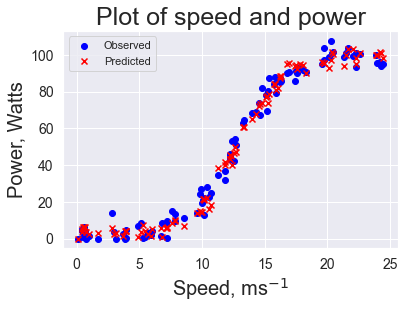

In [59]:
scatter_plot(X_test, y_test, "blue", "o", "Observed")
scatter_plot(X_test, y_pred, "red", "x", "Predicted")
plt.legend()
plt.show()

The predicted values from the regression model are usually close to the observed values.

# Discussion <a name="disc"></a>
All models predict values that are very accurate. However, the Neural Network regresion model done through tensorflow had a coefficient of variation that was approximately 3% lower than the Decision Tree regression model and 1% less than the Random Forest regression model, making it the most accurate one. It was slowest to train the model at 2.5211 seconds however.

The code to make the Decision Tree and Random Forest models to generate predictions will be used to create a Flask server and generate values based on input from the user. In addition, this repository will be encapsulated in Docker image (The Neural Network regression will be omitted as that takes a relatively long time to load and does not produce significantly more accurate results than the Random Forest regression).

Further work will be done in the "Fundamentals of Data Analysis" project. In that project, a linear regression will be performed on the dataset. In addition, a sigmoid function will be fit to the dataset as the data resembles a sigmoid function as well as a polynomial function.

# References <a name="ref"></a>
[1] Medium. 2020. Some Key Machine Learning Definitions. [online] Available at: <https://medium.com/technology-nineleaps/some-key-machine-learning-definitions-b524eb6cb48> [Accessed 28 December 2020]. <a name="1"></a> <br>
[2] 2020. [online] Available at: <https://www.saedsayad.com/decision_tree_reg.html> [Accessed 28 December 2020]. <a name="2"></a> <br>
[3]  DeepAI. 2020. Sigmoid Function. [online] Available at: <https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function> [Accessed 28 December 2020]. <a name="3"></a> <br>
[4] Ferguson, K., 2020. When Should You Delete Outliers From A Data Set? - Atlan | Humans Of Data. [online] Atlan | Humans of Data. Available at: <https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/> [Accessed 28 December 2020]. <a name="4"></a><br>
[5] Use, 1., 2020. How To Assess A Regression's Predictive Power For Energy Use - Kw Engineering. [online] kW Engineering. Available at: <https://www.kw-engineering.com/how-to-assess-a-regressions-predictive-power-energy-use/> [Accessed 28 December 2020].<a name="5"></a> <br>
[6] Medium. 2020. A Beginner’S Guide To Neural Networks: Part One. [online] Available at: <https://towardsdatascience.com/a-beginners-guide-to-neural-networks-b6be0d442fa4> [Accessed 28 December 2020].<a name="6"></a> <br>
[7] Brownlee, J., 2020. Why Initialize A Neural Network With Random Weights?. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/why-initialize-a-neural-network-with-random-weights/> [Accessed 28 December 2020]. <a name="7"></a> <br>
[8] Brownlee, J., 2020. What Is Deep Learning?. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/what-is-deep-learning/> [Accessed 28 December 2020]. <a name="8"></a> <br>
[9] Stack Abuse. 2020. Tensorflow 2.0: Solving Classification And Regression Problems. [online] Available at: <https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/> [Accessed 28 December 2020]. <a name="9"></a> <br>
[10] Brownlee, J., 2020. A Gentle Introduction To The Rectified Linear Unit (Relu). [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/> [Accessed 28 December 2020]. <a name="10"></a> <br>
[11] TensorFlow. 2020. Tf.Keras.Optimizers.Adam  |  Tensorflow Core V2.4.0. [online] Available at: <https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam> [Accessed 28 December 2020]. <a name="11"></a> <br>
[12] Built In. 2020. A Complete Guide To The Random Forest Algorithm. [online] Available at: <https://builtin.com/data-science/random-forest-algorithm> [Accessed 29 December 2020]. <a name="12"></a>